In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
import string

happiness_path = "Resources/Gallup2018.Drew.csv"

happiness_df = pd.read_csv(happiness_path)


Personal_Income_by_State_2018_path = "Resources/Personal Income by State 2018.csv"

Personal_Income_df = pd.read_csv(Personal_Income_by_State_2018_path)


US_State_Tax_Rate_2018_path = "Resources/US State Tax Rate 2018.csv"

State_Tax_Rate_df = pd.read_csv(US_State_Tax_Rate_2018_path)


Poverty_rate_by_US_State_2018_path = "Resources/Poverty rate by US State 2018.csv"

Poverty_Rate_df = pd.read_csv(Poverty_rate_by_US_State_2018_path)


Unemployment_rate_per_US_State_path = "Resources/Unemployment rate per US State.csv"

Unemployment_Rate_df = pd.read_csv(Unemployment_rate_per_US_State_path)

In [2]:
Income_merge_df = pd.merge(Personal_Income_df, happiness_df, on='State', how='inner')
Income_merge_df

,State,LineCode,Description,Average Personal Income,2018 sample size,Well-Being Index,Career,Social,Financial,Community,Physical
0,Alabama,3.0,Per capita personal income (dollars) 2/,41607.0,1656,44,18,37,45,17,48
1,Alaska,3.0,Per capita personal income (dollars) 2/,59783.0,212,3,5,8,2,23,1
2,Arizona,3.0,Per capita personal income (dollars) 2/,45299.0,2347,15,8,11,26,15,17
3,Arkansas,3.0,Per capita personal income (dollars) 2/,43661.0,1129,49,49,50,50,38,46
4,California,3.0,Per capita personal income (dollars) 2/,61509.0,10542,14,22,10,27,39,9
5,Colorado,3.0,Per capita personal income (dollars) 2/,58471.0,2316,6,11,6,10,11,2
6,Connecticut,3.0,Per capita personal income (dollars) 2/,73176.0,1415,16,38,16,21,41,5
7,Delaware,3.0,Per capita personal income (dollars) 2/,52839.0,386,8,26,2,4,22,10
8,Florida,3.0,Per capita personal income (dollars) 2/,51444.0,6928,20,13,5,36,21,16
9,Georgia,3.0,Per capita personal income (dollars) 2/,46824.0,2994,23,17,15,40,28,21


In [3]:
df = Income_merge_df
del df["LineCode"]
del df["Description"]
del df["2018 sample size"]
del df["Social"]
del df["Community"]
del df["Physical"]
Income_merge_df

,State,Average Personal Income,Well-Being Index,Career,Financial
0,Alabama,41607.0,44,18,45
1,Alaska,59783.0,3,5,2
2,Arizona,45299.0,15,8,26
3,Arkansas,43661.0,49,49,50
4,California,61509.0,14,22,27
5,Colorado,58471.0,6,11,10
6,Connecticut,73176.0,16,38,21
7,Delaware,52839.0,8,26,4
8,Florida,51444.0,20,13,36
9,Georgia,46824.0,23,17,40


In [4]:
Income_merge_df.describe()

,Average Personal Income,Well-Being Index,Career,Financial
count,50.000000,50.00000,50.00000,50.00000
mean,51784.140000,25.50000,25.50000,25.50000
std,7644.107988,14.57738,14.57738,14.57738
min,37927.000000,1.00000,1.00000,1.00000
25%,46561.500000,13.25000,13.25000,13.25000
50%,50814.500000,25.50000,25.50000,25.50000
75%,56554.000000,37.75000,37.75000,37.75000
max,73176.000000,50.00000,50.00000,50.00000


In [5]:
Income_merge_df = Income_merge_df.set_index('State')

In [6]:
well_being_index_rank = Income_merge_df.iloc[:,2]
average_personal_income = Income_merge_df.iloc[:,0]

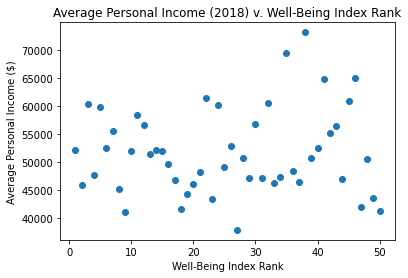

In [7]:
plt.scatter(well_being_index_rank, average_personal_income)

# formatting
plt.xlabel('Well-Being Index Rank')
plt.ylabel('Average Personal Income ($)')
plt.title('Average Personal Income (2018) v. Well-Being Index Rank')

plt.show()

In [8]:
# Calculate the correlation coefficient and linear regression model 

corr=st.pearsonr(well_being_index_rank, average_personal_income,)
print(f"The correlation between Average Personal Income and a State's Well-Being Index Rank is {round(corr[0],2)}")

The correlation between Average Personal Income and a State's Well-Being Index Rank is 0.07


In [9]:
x_values = well_being_index_rank
y_values = average_personal_income


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:37.53272509003602
intercept:50827.05551020408
rvalue (Correlation coefficient):0.07157522984138444
pandas (Correlation coefficient):(0.07157522984138445, 0.6213439122100115)
stderr:75.49382329654675
y = 37.53x + 50827.06


The r-squared is: 0.005


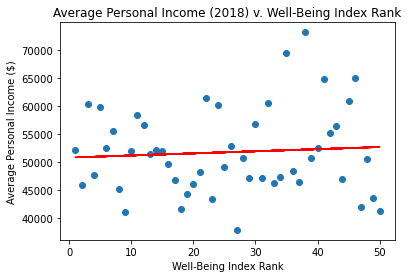

In [10]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Well-Being Index Rank')
plt.ylabel('Average Personal Income ($)')
plt.title('Average Personal Income (2018) v. Well-Being Index Rank')



# Print out the r-squared value along with the plot.

print(f"The r-squared is: {round(rvalue**2,3)}")
plt.savefig("./Images/Personal Income.png", bbox_inches = "tight")
plt.show()

In [11]:
Tax_merge_df = pd.merge(State_Tax_Rate_df, happiness_df, on='State', how='inner')
Tax_merge_df

,State,State Tax Rate,Rank,Avg. Local Tax Rate (a),Unnamed: 4,Combined Rate,Combined Rank,Max Local Tax Rate,2018 sample size,Well-Being Index,Career,Social,Financial,Community,Physical
0,Alabama,4.00%,40,5.10%,0.0910,9.10,5,7.50%,1656,44,18,37,45,17,48
1,Alaska,0.00%,46,1.76%,0.0176,1.76,46,7.50%,212,3,5,8,2,23,1
2,Arizona,5.60%,28,2.73%,0.0833,8.33,11,5.30%,2347,15,8,11,26,15,17
3,Arkansas,6.50%,9,2.91%,0.0941,9.41,3,5.13%,1129,49,49,50,50,38,46
4,Colorado,2.90%,45,4.62%,0.0752,7.52,16,8.30%,2316,6,11,6,10,11,2
5,Connecticut,6.35%,12,0.00%,0.0635,6.35,33,0.00%,1415,16,38,16,21,41,5
6,Delaware,0.00%,46,0.00%,0.0000,0.00,47,0.00%,386,8,26,2,4,22,10
7,Florida,6.00%,16,0.80%,0.0680,6.80,28,2.00%,6928,20,13,5,36,21,16
8,Georgia,4.00%,40,3.15%,0.0715,7.15,20,4.90%,2994,23,17,15,40,28,21
9,Idaho,6.00%,16,0.03%,0.0603,6.03,37,3.00%,762,22,23,38,33,3,32


In [12]:
df = Tax_merge_df
del df["State Tax Rate"]
del df["Rank"]
del df["Avg. Local Tax Rate (a)"]
del df["Max Local Tax Rate"]
del df["2018 sample size"]
del df["Unnamed: 4"]
del df["Social"]
del df["Community"]
del df["Physical"]
Tax_merge_df

,State,Combined Rate,Combined Rank,Well-Being Index,Career,Financial
0,Alabama,9.10,5,44,18,45
1,Alaska,1.76,46,3,5,2
2,Arizona,8.33,11,15,8,26
3,Arkansas,9.41,3,49,49,50
4,Colorado,7.52,16,6,11,10
5,Connecticut,6.35,33,16,38,21
6,Delaware,0.00,47,8,26,4
7,Florida,6.80,28,20,13,36
8,Georgia,7.15,20,23,17,40
9,Idaho,6.03,37,22,23,33


In [13]:
Tax_merge_df.describe()

,Combined Rate,Combined Rank,Well-Being Index,Career,Financial
count,42.000000,42.000000,42.00000,42.000000,42.000000
mean,6.671429,24.238095,27.47619,27.619048,26.571429
std,2.376007,14.374451,14.23537,13.689862,14.965233
min,0.000000,1.000000,2.00000,3.000000,2.000000
25%,6.067500,12.250000,16.25000,16.250000,14.250000
50%,6.975000,23.000000,27.00000,27.500000,27.500000
75%,8.162500,36.750000,39.75000,38.750000,39.750000
max,10.020000,47.000000,50.00000,50.000000,50.000000


In [14]:
Tax_merge_df = Tax_merge_df.set_index('State')

In [15]:
well_being_index_rank = Tax_merge_df.iloc[:,2]
total_tax_rate = Tax_merge_df.iloc[:,0]

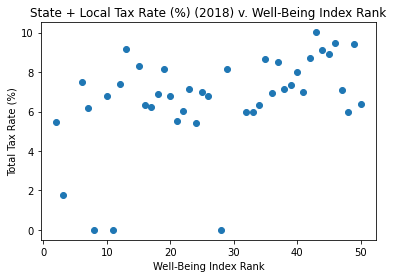

In [16]:
plt.scatter(well_being_index_rank, total_tax_rate)


# formatting
plt.xlabel('Well-Being Index Rank')
plt.ylabel('Total Tax Rate (%)')
plt.title('State + Local Tax Rate (%) (2018) v. Well-Being Index Rank')

plt.show()

In [17]:
# Calculate the correlation coefficient and linear regression model 

corr=st.pearsonr(well_being_index_rank, total_tax_rate)
print(f"The correlation between Total Tax Rate and a State's Well-Being Index Rank is {round(corr[0],2)}")

The correlation between Total Tax Rate and a State's Well-Being Index Rank is 0.46


In [18]:
x_values = well_being_index_rank
y_values = total_tax_rate


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.07639203796467176
intercept:4.5724663854468774
rvalue (Correlation coefficient):0.4576876600206446
pandas (Correlation coefficient):(0.4576876600206446, 0.0023066188919205555)
stderr:0.02346420688330112
y = 0.08x + 4.57


The r-squared is: 0.209


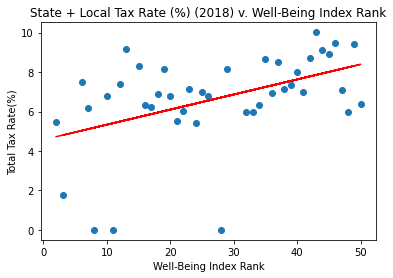

In [19]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Well-Being Index Rank')
plt.ylabel('Total Tax Rate(%)')
plt.title('State + Local Tax Rate (%) (2018) v. Well-Being Index Rank')



# Print out the r-squared value along with the plot.

print(f"The r-squared is: {round(rvalue**2,3)}")
plt.savefig("./Images/Tax Rate.png", bbox_inches = "tight")
plt.show()

In [20]:
Poverty_merge_df = pd.merge(Poverty_Rate_df, happiness_df, on='State', how='inner')
Poverty_merge_df

,State,Unnamed: 1,Poverty rate 2018,2018 sample size,Well-Being Index,Career,Social,Financial,Community,Physical
0,Alabama,0.168,16.8,1656,44,18,37,45,17,48
1,Alaska,0.109,10.9,212,3,5,8,2,23,1
2,Arizona,0.140,14.0,2347,15,8,11,26,15,17
3,Arkansas,0.172,17.2,1129,49,49,50,50,38,46
4,California,0.128,12.8,10542,14,22,10,27,39,9
5,Colorado,0.096,9.6,2316,6,11,6,10,11,2
6,Connecticut,0.104,10.4,1415,16,38,16,21,41,5
7,Delaware,0.125,12.5,386,8,26,2,4,22,10
8,Florida,0.136,13.6,6928,20,13,5,36,21,16
9,Georgia,0.143,14.3,2994,23,17,15,40,28,21


In [21]:
df = Poverty_merge_df
del df["Unnamed: 1"]
del df["2018 sample size"]
del df["Social"]
del df["Community"]
del df["Physical"]
Poverty_merge_df

,State,Poverty rate 2018,Well-Being Index,Career,Financial
0,Alabama,16.8,44,18,45
1,Alaska,10.9,3,5,2
2,Arizona,14.0,15,8,26
3,Arkansas,17.2,49,49,50
4,California,12.8,14,22,27
5,Colorado,9.6,6,11,10
6,Connecticut,10.4,16,38,21
7,Delaware,12.5,8,26,4
8,Florida,13.6,20,13,36
9,Georgia,14.3,23,17,40


In [22]:
Poverty_merge_df.describe()

,Poverty rate 2018,Well-Being Index,Career,Financial
count,50.000000,50.00000,50.00000,50.00000
mean,12.846000,25.50000,25.50000,25.50000
std,2.830101,14.57738,14.57738,14.57738
min,7.600000,1.00000,1.00000,1.00000
25%,10.925000,13.25000,13.25000,13.25000
50%,12.700000,25.50000,25.50000,25.50000
75%,14.075000,37.75000,37.75000,37.75000
max,19.700000,50.00000,50.00000,50.00000


In [23]:
Poverty_merge_df = Poverty_merge_df.set_index('State')

In [24]:
well_being_index_rank = Poverty_merge_df.iloc[:,2]
Poverty_Rate = Poverty_merge_df.iloc[:,0]

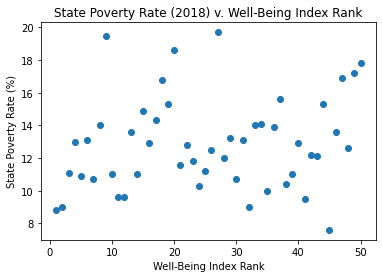

In [25]:
plt.scatter(well_being_index_rank, Poverty_Rate)

# formatting
plt.xlabel('Well-Being Index Rank')
plt.ylabel('State Poverty Rate (%)')
plt.title('State Poverty Rate (2018) v. Well-Being Index Rank')

plt.show()

In [26]:
corr=st.pearsonr(well_being_index_rank, Poverty_Rate)
print(f"The correlation between Poverty Rate and a State's Well-Being Index Rank is {round(corr[0],2)}")

The correlation between Poverty Rate and a State's Well-Being Index Rank is 0.17


In [27]:
x_values = well_being_index_rank
y_values = Poverty_Rate

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.033358943577430966
intercept:11.995346938775512
rvalue (Correlation coefficient):0.1718263530309922
pandas (Correlation coefficient):(0.1718263530309922, 0.23280528337060308)
stderr:0.027605411886130585
y = 0.03x + 12.0


The r-squared is: 0.03


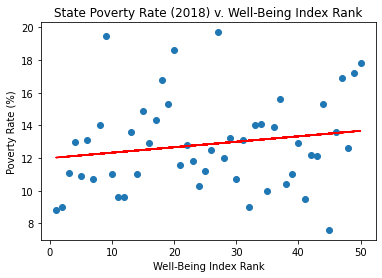

In [28]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Well-Being Index Rank')
plt.ylabel('Poverty Rate (%)')
plt.title('State Poverty Rate (2018) v. Well-Being Index Rank')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {round(rvalue**2,3)}")
plt.savefig("./Images/Poverty Rate.png", bbox_inches = "tight")
plt.show()

In [29]:
Unemployment_merge_df = pd.merge(Unemployment_Rate_df, happiness_df, on='State', how='inner')
Unemployment_merge_df

,State,2018,2018 sample size,Well-Being Index,Career,Social,Financial,Community,Physical
0,Alabama,3.9,1656,44,18,37,45,17,48
1,Alaska,6.6,212,3,5,8,2,23,1
2,Arizona,4.8,2347,15,8,11,26,15,17
3,Arkansas,3.7,1129,49,49,50,50,38,46
4,California,4.2,10542,14,22,10,27,39,9
5,Colorado,3.3,2316,6,11,6,10,11,2
6,Connecticut,4.1,1415,16,38,16,21,41,5
7,Delaware,3.8,386,8,26,2,4,22,10
8,Florida,3.6,6928,20,13,5,36,21,16
9,Georgia,3.9,2994,23,17,15,40,28,21


In [30]:
df = Unemployment_merge_df
del df["2018 sample size"]
del df["Social"]
del df["Community"]
del df["Physical"]
Unemployment_merge_df

,State,2018,Well-Being Index,Career,Financial
0,Alabama,3.9,44,18,45
1,Alaska,6.6,3,5,2
2,Arizona,4.8,15,8,26
3,Arkansas,3.7,49,49,50
4,California,4.2,14,22,27
5,Colorado,3.3,6,11,10
6,Connecticut,4.1,16,38,21
7,Delaware,3.8,8,26,4
8,Florida,3.6,20,13,36
9,Georgia,3.9,23,17,40


In [31]:
Unemployment_merge_df.describe()

,2018,Well-Being Index,Career,Financial
count,50.000000,50.00000,50.00000,50.00000
mean,3.776000,25.50000,25.50000,25.50000
std,0.819796,14.57738,14.57738,14.57738
min,2.400000,1.00000,1.00000,1.00000
25%,3.225000,13.25000,13.25000,13.25000
50%,3.850000,25.50000,25.50000,25.50000
75%,4.200000,37.75000,37.75000,37.75000
max,6.600000,50.00000,50.00000,50.00000


In [32]:
Unemployment_merge_df = Unemployment_merge_df.set_index('State')

In [33]:
well_being_index_rank = Unemployment_merge_df.iloc[:,2]
Unemployment_Rate = Unemployment_merge_df.iloc[:,0]

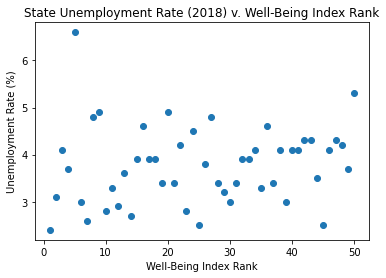

In [34]:
plt.scatter(well_being_index_rank, Unemployment_Rate)

# formatting
plt.xlabel('Well-Being Index Rank')
plt.ylabel('Unemployment Rate (%)')
plt.title('State Unemployment Rate (2018) v. Well-Being Index Rank')

plt.show()

In [35]:
# Calculate the correlation coefficient and linear regression model 

corr=st.pearsonr(well_being_index_rank, Unemployment_Rate)
print(f"The correlation between Unemployment Rate and a State's Well-Being Index Rank is {round(corr[0],2)}")

The correlation between Unemployment Rate and a State's Well-Being Index Rank is 0.13


In [36]:
x_values = well_being_index_rank
y_values = Unemployment_Rate

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.007078031212484991
intercept:3.5955102040816325
rvalue (Correlation coefficient):0.1258595580448048
pandas (Correlation coefficient):(0.12585955804480484, 0.3837965807583516)
stderr:0.008052641567446376
y = 0.01x + 3.6


The r-squared is: 0.016


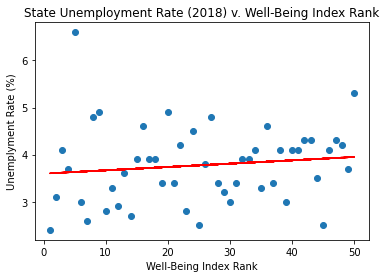

In [37]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Well-Being Index Rank')
plt.ylabel('Unemplyment Rate (%)')
plt.title('State Unemployment Rate (2018) v. Well-Being Index Rank')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {round(rvalue**2,3)}")
plt.savefig("./Images/Unemployment Rate.png", bbox_inches = "tight")
plt.show()